# Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import OLS
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('data/kc_house_data.csv', index_col='id')

In [29]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

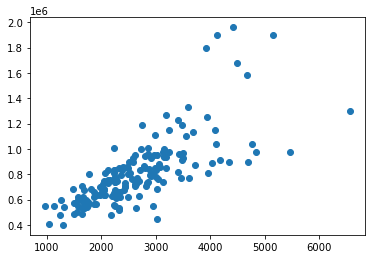

In [5]:
y = df[df['zipcode'] == 98005]['price']
x = df[df['zipcode'] == 98005]['sqft_living']

plt.scatter(x, y)

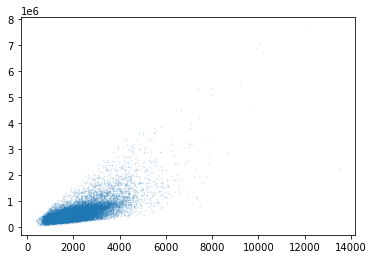

In [6]:
# sqft_living
# price

x = df['sqft_living']
y = df['price']

plt.scatter(x, y, alpha = .15, s= .4)

In [7]:
df[df['zipcode'] == 98005].corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.293229,0.602608,0.740920,0.566596,0.435987,0.777308,0.427175,0.098636,NaN,0.529695,0.198970,0.674625,0.397516
bedrooms,0.293229,1.000000,0.362850,0.545460,0.299922,0.084771,0.302207,0.026695,-0.081983,NaN,0.218388,0.143646,0.275105,0.222452
bathrooms,0.602608,0.362850,1.000000,0.716835,0.383228,0.478232,0.620989,0.550833,0.041331,NaN,0.387685,0.226978,0.536440,0.345951
sqft_living,0.740920,0.545460,0.716835,1.000000,0.510779,0.426776,0.786090,0.401876,0.004121,NaN,0.499581,0.185618,0.658809,0.403712
sqft_lot,0.566596,0.299922,0.383228,0.510779,1.000000,0.321917,0.504037,0.166455,-0.013749,NaN,0.611847,0.283477,0.600156,0.619629
floors,0.435987,0.084771,0.478232,0.426776,0.321917,1.000000,0.652533,0.620710,-0.102883,NaN,0.388322,0.342794,0.418034,0.221950
sqft_above,0.777308,0.302207,0.620989,0.786090,0.504037,0.652533,1.000000,0.454368,0.079430,NaN,0.546579,0.259574,0.696711,0.399360
yr_built,0.427175,0.026695,0.550833,0.401876,0.166455,0.620710,0.454368,1.000000,-0.211315,NaN,0.238243,0.361009,0.318313,0.161520
yr_renovated,0.098636,-0.081983,0.041331,0.004121,-0.013749,-0.102883,0.079430,-0.211315,1.000000,NaN,0.040105,-0.041954,-0.081255,0.020770
zipcode,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

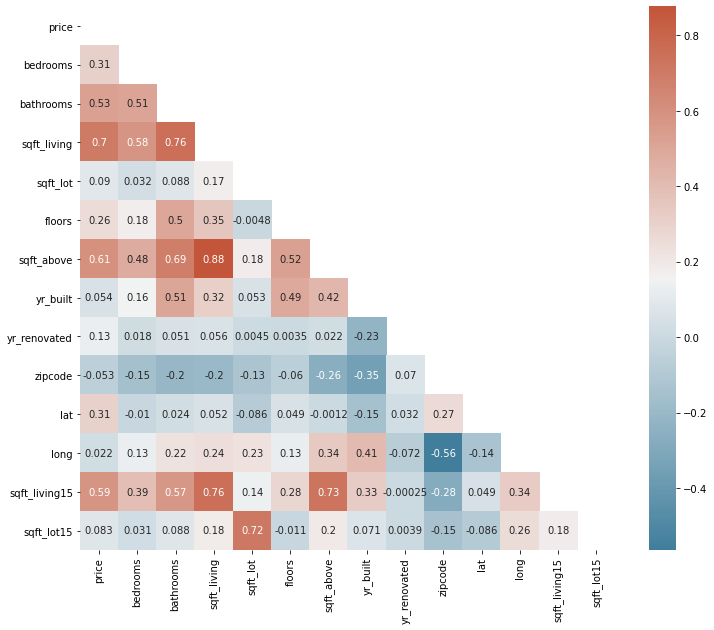

In [8]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

<AxesSubplot:>

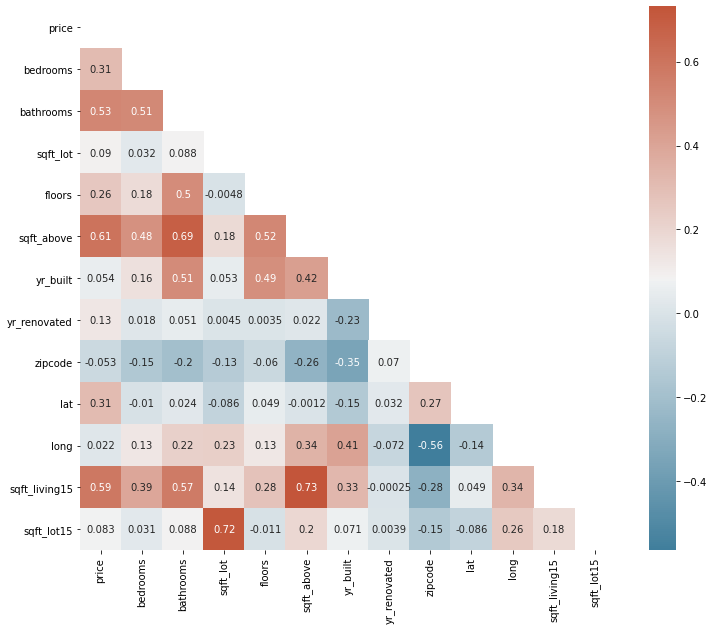

In [9]:
heat2 = df.drop('sqft_living', axis=1).corr()
f, ax = plt.subplots(figsize=(12, 10))
mask2 = np.triu(np.ones_like(heat2, dtype=bool))
sns.heatmap(heat2, annot=True, mask=mask2, cmap=cmap)

In [10]:
zipcodes = pd.get_dummies(df.zipcode)
zip_cat = pd.concat([df, zipcodes], axis=1)

In [27]:
zip_price = pd.concat([df.price, df.sqft_living, zipcodes], axis=1) #grade_labels[0].astype('int64')

# y = zip_price[(zip_price[98117] == 1) & (zip_price[0] == 6)].price
# x = zip_price[(zip_price[98117] == 1) & (zip_price[0] == 6)].sqft_living

# plt.scatter(x, y)
# grade_set = list(set(zip_price[0]))

# zip_price[(zip_price[0] == 7) & (zip_price[98001] == 1)]

# x2 = zip_price[(zip_price[98117] == 1) & (zip_price[0] == 8)].sqft_living
# y2 = zip_price[(zip_price[98117] == 1) & (zip_price[0] == 8)].price

# plt.scatter(x2, y2)

y3 = zip_price.price
x3 = zip_price.drop('price', axis=1)

lr = LinearRegression()

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=.2)

lr.fit(x3_train, y3_train)

lr.score(x3_test, y3_test) # ~.75 

# try making the grade categorical

grade_cat = zip_price#.drop(0, axis=1)
grade_cat = pd.concat([grade_cat, pd.get_dummies(df.grade)], axis=1)

y4 = grade_cat.price
x4 = grade_cat.drop('price', axis=1)

x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=.2)

lr.fit(x4_train, y4_train)

lr.score(x4_test, y4_test) # ~.77

grade_cat

price = y4_train
preds = x4_train
test_lm1 = OLS(price,preds)
results = test_lm1.fit()
results.summary()

# lr.predict()
# grade_cat

y5 = grade_cat.price
x5 = grade_cat.drop('price', axis=1)

x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=.2)

lr.fit(x4_train, y4_train)

price = y5_train
preds = x5_train
test_lm1 = OLS(price,preds)
results = test_lm1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     765.8
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        08:32:32   Log-Likelihood:            -2.3288e+05
No. Observations:               17277   AIC:                         4.659e+05
Df Residuals:                   17196   BIC:                         4.666e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_living     176.1932      2.323     75.858      0.000     171.641     180.746
98001         -1.421e+05   1.06e+04    -13.357      0.000   -1.63e+05   -1.21e+05
98002          -1.27e+05   1.37e+04     -9.268      0.000   -1.54e+05      -1e+05
98003         -1.363e+05   1.15e+04    -11.827      0.000   -1.59e+05   -1.14e+05
98004          6.233e+05   1.11e+04     56.174      0.000    6.02e+05    6.45e+05
98005          1.558e+05   1.49e+04     10.456      0.000    1.27e+05    1.85e+05
98006          1.262e+05   9108.011     13.854      0.000    1.08e+05    1.44e+05
98007          1.097e+05   1.61e+04      6.795      0.000    7.81e+04    1.41e+05
98008          1.679e+05   1.17e+04     14.316      0.000    1.45e+05    1.91e+05
98010          -7.59e+04   1.94e+04     -3.917      0.000   -1.14e+05   -3.79e+04
98011         -7878.7079   1.41e+04     -0.559      0.576   -3.55e+04    1.98e+04
98014         -4.615e+04   1.73e+04     -2.668      0.008      -8e+04   -1.22e+04
98019         -5.144e+04   1.42e+04     -3.633      0.000   -7.92e+04   -2.37e+04
98022         -9.115e+04   1.31e+04     -6.978      0.000   -1.17e+05   -6.55e+04
98023         -1.649e+05   9105.967    -18.111      0.000   -1.83e+05   -1.47e+05
98024          3.843e+04    2.1e+04      1.832      0.067   -2678.395    7.95e+04
98027          1.644e+04   1.01e+04      1.629      0.103   -3340.550    3.62e+04
98028         -4722.0146   1.18e+04     -0.401      0.688   -2.78e+04    1.83e+04
98029          6.818e+04    1.1e+04      6.214      0.000    4.67e+04    8.97e+04
98030         -1.419e+05   1.24e+04    -11.451      0.000   -1.66e+05   -1.18e+05
98031         -1.287e+05    1.2e+04    -10.755      0.000   -1.52e+05   -1.05e+05
98032          -1.36e+05   1.76e+04     -7.724      0.000   -1.71e+05   -1.02e+05
98033          2.272e+05   9800.379     23.178      0.000    2.08e+05    2.46e+05
98034          6.665e+04   8706.087      7.656      0.000    4.96e+04    8.37e+04
98038         -1.128e+05   8378.916    -13.467      0.000   -1.29e+05   -9.64e+04
98039          1.073e+06   2.74e+04     39.188      0.000    1.02e+06    1.13e+06
98040          4.109e+05   1.17e+04     35.076      0.000    3.88e+05    4.34e+05
98042           -1.3e+05   8691.852    -14.959      0.000   -1.47e+05   -1.13e+05
98045         -3.928e+04   1.32e+04     -2.974      0.003   -6.52e+04   -1.34e+04
98052          9.315e+04   8433.079     11.046      0.000    7.66e+04     1.1e+05
98053          5.727e+04   9941.629      5.761      0.000    3.78e+04    7.68e+04
98055         -1.022e+05    1.2e+04     -8.498      0.000   -1.26e+05   -7.86e+04
98056         -3.861e+04   1.03e+04     -3.734      0.000   -5.89e+04   -1.83e+04
98058         -1.086e+05   9354.964    -11.612      0.000   -1.27e+05   -9.03e+04
98059         -6.859e+04   9348.550     -7.337   

In [101]:
y6 = zip_cat.price
x6 = zip_cat.drop(['price', 'date', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 
                   'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 
                   'sqft_living15', 'sqft_lot15'], axis=1)

x6_train, x6_test, y6_train, y6_test = train_test_split(x6, y6, test_size=.2)

lr.fit(x6_train, y6_train)

price = y6_train
preds = x6_train
test_lm1 = OLS(price,preds)
results = test_lm1.fit()
results.summary()

# lr.score(x6_test, y6_test)

# bed + bath + zip + sqft ~.74
# x6.columns

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     691.1
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        09:50:54   Log-Likelihood:            -2.3433e+05
No. Observations:               17277   AIC:                         4.688e+05
Df Residuals:                   17204   BIC:                         4.694e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bedrooms    -4.607e+04   1933.641    -23.824      0.000   -4.99e+04   -4.23e+04
bathrooms    9597.3198   2956.998      3.246      0.001    3801.302    1.54e+04
sqft_living   275.7606      2.674    103.127      0.000     270.519     281.002
98001       -1.108e+05   1.23e+04     -8.986      0.000   -1.35e+05   -8.66e+04
98002        -7.85e+04   1.57e+04     -5.007      0.000   -1.09e+05   -4.78e+04
98003       -1.004e+05    1.4e+04     -7.193      0.000   -1.28e+05    -7.3e+04
98004        7.261e+05   1.35e+04     53.693      0.000       7e+05    7.53e+05
98005        2.301e+05   1.77e+04     13.017      0.000    1.95e+05    2.65e+05
98006        2.162e+05   1.16e+04     18.589      0.000    1.93e+05    2.39e+05
98007        1.713e+05   1.92e+04      8.918      0.000    1.34e+05    2.09e+05
98008         2.18e+05   1.42e+04     15.335      0.000     1.9e+05    2.46e+05
98010       -4.083e+04   2.17e+04     -1.886      0.059   -8.33e+04    1614.488
98011        1.073e+04   1.59e+04      0.673      0.501   -2.05e+04     4.2e+04
98014       -1.623e+04   1.92e+04     -0.845      0.398   -5.39e+04    2.14e+04
98019       -3.493e+04   1.63e+04     -2.149      0.032   -6.68e+04   -3074.794
98022       -6.143e+04   1.46e+04     -4.204      0.000   -9.01e+04   -3.28e+04
98023       -1.281e+05    1.1e+04    -11.696      0.000    -1.5e+05   -1.07e+05
98024        4.259e+04   2.44e+04      1.745      0.081   -5241.727    9.04e+04
98027        6.528e+04    1.2e+04      5.428      0.000    4.17e+04    8.89e+04
98028        2.031e+04    1.4e+04      1.447      0.148   -7200.564    4.78e+04
98029        1.128e+05   1.33e+04      8.458      0.000    8.66e+04    1.39e+05
98030       -1.018e+05   1.44e+04     -7.082      0.000    -1.3e+05   -7.36e+04
98031       -8.607e+04   1.43e+04     -6.019      0.000   -1.14e+05    -5.8e+04
98032       -8.717e+04   2.02e+04     -4.315      0.000   -1.27e+05   -4.76e+04
98033        2.939e+05   1.18e+04     24.895      0.000    2.71e+05    3.17e+05
98034        1.122e+05   1.07e+04     10.460      0.000    9.11e+04    1.33e+05
98038       -9.593e+04   1.06e+04     -9.086      0.000   -1.17e+05   -7.52e+04
98039        1.301e+06   2.94e+04     44.223      0.000    1.24e+06    1.36e+06
98040        4.943e+05   1.46e+04     33.748      0.000    4.66e+05    5.23e+05
98042       -9.789e+04   1.07e+04     -9.136      0.000   -1.19e+05   -7.69e+04
98045        3017.1935   1.53e+04      0.197      0.844    -2.7e+04    3.31e+04
98052        1.351e+05   1.09e+04     12.449      0.000    1.14e+05    1.56e+05
98053        8.462e+04   1.19e+04      7.090      0.000    6.12e+04    1.08e+05
98055       -6.313e+04   1.42e+04     -4.447      0.000    -9.1e+04   -3.53e+04
98056       -1731.5498   1.19e+04     -0.146      0.884    -2.5e+04    2.15e+04
98058       -7.081e+04   1.15e+04     -6.16

In [99]:
def price_predictor():
    beds = int(input('How many bedrooms?'))
    baths = int(input('How many bathrooms?'))
    sqft = int(input('How many square feet?'))
    zip_ = int(input('What is the zipcode?'))
    
    entry = pd.DataFrame(0, index=['sample'], columns=x6.columns)
    entry['bedrooms'] = beds
    entry['bathrooms'] = baths
    entry['sqft_living'] = sqft
    entry[zip_] = 1
    
    price_target = f'${round(float(lr.predict(entry)), 2)}'
    return price_target

price_predictor()


How many bedrooms?1
How many bathrooms?1
How many square feet?750
What is the zipcode?98117


'$409115.86'

In [17]:
y = trimmed.price
X = trimmed.drop('price', axis=1)

trimmed.columns # sqft + zipcode

Index([      'price', 'sqft_living',         98001,         98002,
               98003,         98004,         98005,         98006,
               98007,         98008,         98010,         98011,
               98014,         98019,         98022,         98023,
               98024,         98027,         98028,         98029,
               98030,         98031,         98032,         98033,
               98034,         98038,         98039,         98040,
               98042,         98045,         98052,         98053,
               98055,         98056,         98058,         98059,
               98065,         98070,         98072,         98074,
               98075,         98077,         98092,         98102,
               98103,         98105,         98106,         98107,
               98108,         98109,         98112,         98115,
               98116,         98117,         98118,         98119,
               98122,         98125,         98126,         98

In [18]:
model = LinearRegression()

In [19]:
model.fit(X,y)

LinearRegression()

In [20]:
model.score(X,y)

0.7299516639561129

In [21]:
x_var = df[['sqft_living']] # grade
y_var = df.price

X_train, X_test, y_train, y_test = train_test_split(x_var, y_var, test_size=.2)

In [22]:
model.fit(X_train,y_train)
model.score(X_test, y_test) # training = 0.49938431424133234

# USE LABEL ENCODING FOR GRADE

0.4911735221167911

In [23]:
le = LabelEncoder()

# seperate value for grade

grade_labels = df.grade.str.split(' ', 1, expand=True)
new_df = pd.concat([df.price, df.sqft_living, df.zipcode.astype('object'), grade_labels[0].astype('int64')], axis=1)

x = new_df.drop('price', axis=1)
y = new_df.price

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2)

model.fit(X_train,y_train)
model.score(X_test, y_test)

model.coef_

array([   185.72185944,    694.15174229, 103011.31093926])

In [24]:
# sss = new_df.reset_index().drop('id', axis=1)

In [25]:
new_df.groupby('zipcode').count()

,price,sqft_living,0
zipcode,,,
98001,361,361,361
98002,199,199,199
98003,280,280,280
98004,317,317,317
98005,168,168,168
...,...,...,...
98177,255,255,255
98178,262,262,262
98188,136,136,136


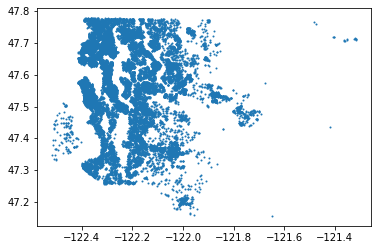

In [26]:
plt.scatter(df.long, df.lat, s=1)